In [1]:
# automatically update imports
%load_ext autoreload
%autoreload 2

# For graphs
%matplotlib inline

# snippet for relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
import loaders

city_ref = 'sant_feliu'
bbox = [41.3700, 2.0203, 41.3973, 2.0774]
pois = loaders.load_osm_pois(city_ref, bbox)
activity_kde = loaders.load_osm_grid_kde(city_ref, pois, bbox)

Querying locally for `['osm_pois']`
Found ['osm_pois'] stored locally
Querying locally for `['activities']`
Found ['activities'] stored locally


In [6]:
import measures
import kde

xx, yy = kde._grid_from_bbox(bbox, .0015)
f = activity_kde.values

I = measures.moran_index(xx, yy, f)
C = measures.geary_index(xx, yy, f)
H = measures.relative_entropy(f)

print('Sant Feliu: I = %f, C = %f, H = %f' % (I, C, H))

Sant Feliu: I = 0.455458, C = 0.833938, H = 0.925703


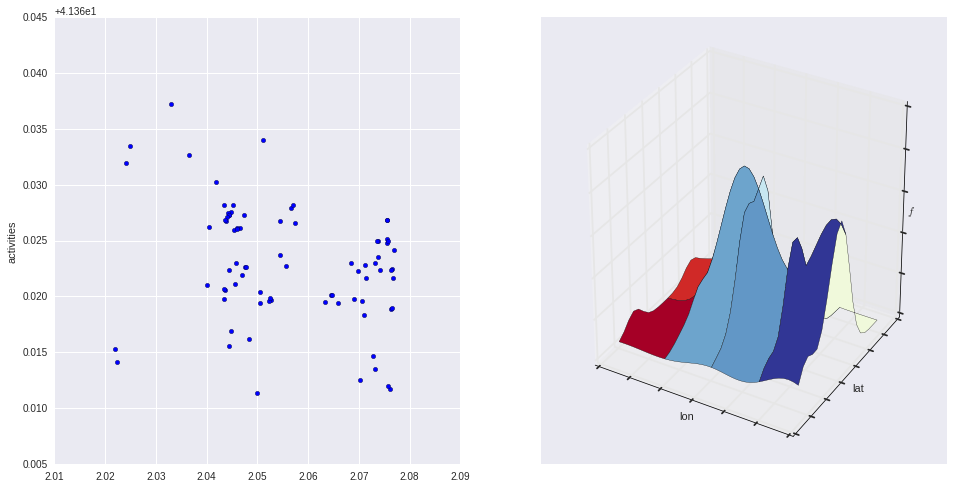

In [27]:
from plots import plot_category_kde

%matplotlib qt
plot_category_kde(activity_kde, pois, xx, yy, 'activities')